# Course Title: Sentiment Analysis of Big Data .

#  Project Title : Sentimental Analysis for Tweets .



Lujain Asfour - 
Layan Hyasat  -
Sadeen Assad  -
Majd Nashat  

# IMPORTING NECESSARY LIBRARIES

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import nltk
import string
from nltk.tokenize import word_tokenize

In [116]:
dataset = pd.read_csv("sentiment_tweets3.csv")


In [117]:
dataset

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [118]:
dataset= dataset.rename(columns = {"message to examine":"text", "label (depression result)" :"Category" })
dataset

,Index,text,Category
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


# Data Preprocessing

In [158]:
dataset = dataset[["text", "Category"]]
dataset

,text,Category
0,just had a real good moment. i missssssssss hi...,Not Depressed
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed
...,...,...
10308,Many sufferers of depression aren't sad; they ...,Depressed
10309,No Depression by G Herbo is my mood from now o...,Depressed
10310,What do you do when depression succumbs the br...,Depressed
10311,Ketamine Nasal Spray Shows Promise Against Dep...,Depressed


In [159]:
dataset.shape
print("the number of row : ",dataset.shape[0])
print("the number of column : ",dataset.shape[1])

the number of row :  10282
the number of column :  2


In [160]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10282 entries, 0 to 10312
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      10282 non-null  object
 1   Category  10282 non-null  object
dtypes: object(2)
memory usage: 241.0+ KB


In [161]:
dataset.isnull().sum()

text        0
Category    0
dtype: int64

In [162]:
dataset.duplicated().sum()
print("the number of duplicated values: ",dataset.duplicated().sum())

the number of duplicated values:  0


In [163]:
dataset = dataset.drop_duplicates()

In [164]:
dataset.duplicated().sum()
print("the number of duplicated values: ",dataset.duplicated().sum())

the number of duplicated values:  0


In [165]:
# THE SHAPE AFTER REMOVING DUPLICATE VALUES
dataset.shape
print("the number of row after removing  duplicated values  : ",dataset.shape[0])
print("the number of column : ",dataset.shape[1])

the number of row after removing  duplicated values  :  10282
the number of column :  2


In [166]:
dataset["Category"].unique()

array(['Not Depressed', 'Depressed'], dtype=object)

In [167]:
dataset['Category'] = dataset['Category'].replace(0,'Not Depressed')
dataset['Category'] = dataset['Category'].replace(1,'Depressed')

In [168]:
dataset

,text,Category
0,just had a real good moment. i missssssssss hi...,Not Depressed
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed
...,...,...
10308,Many sufferers of depression aren't sad; they ...,Depressed
10309,No Depression by G Herbo is my mood from now o...,Depressed
10310,What do you do when depression succumbs the br...,Depressed
10311,Ketamine Nasal Spray Shows Promise Against Dep...,Depressed


In [169]:
dataset["Category"].value_counts()

Category
Not Depressed    7996
Depressed        2286
Name: count, dtype: int64

Text(0.5, 1.0, 'COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT')

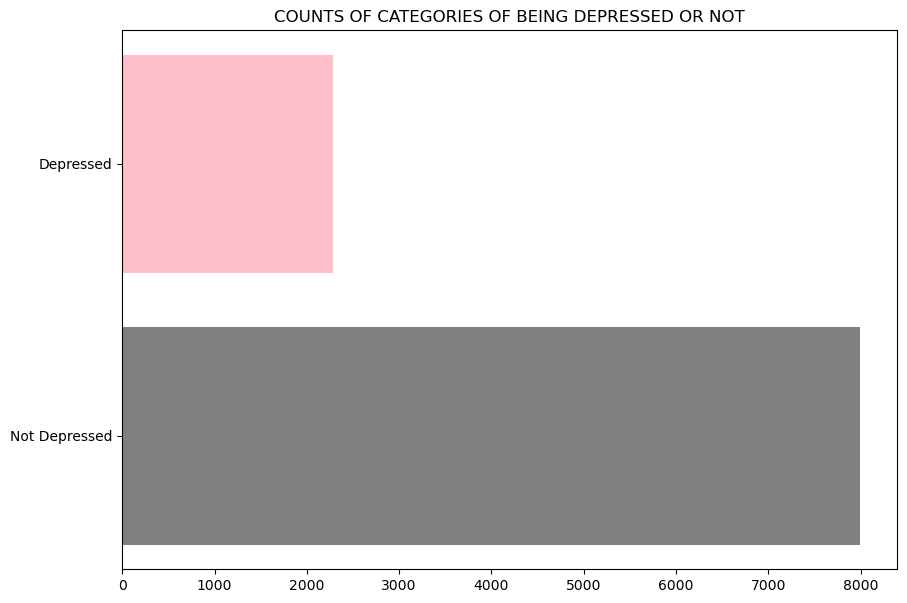

In [170]:
fig = plt.figure(figsize =(10, 7))
plt.barh(dataset["Category"].unique(), dataset["Category"].value_counts(), 
         color =['grey', 'pink'])
plt.title("COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT")

# Process the text 


In [195]:
dataset['text']

0        just had a real good moment. i missssssssss hi...
1               is reading manga  http://plurk.com/p/mzp1e
2        @comeagainjen http://twitpic.com/2y2lx - http:...
3        @lapcat Need to send 'em to my accountant tomo...
4            ADD ME ON MYSPACE!!!  myspace.com/LookThunder
                               ...                        
10308    Many sufferers of depression aren't sad; they ...
10309    No Depression by G Herbo is my mood from now o...
10310    What do you do when depression succumbs the br...
10311    Ketamine Nasal Spray Shows Promise Against Dep...
10312    dont mistake a bad day with depression! everyo...
Name: text, Length: 10282, dtype: object

In [196]:
dataset['text_cleaned']=dataset['text'].str.lower()
dataset.head()

,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,just had a real good moment. i missssssssss hi...
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,is reading manga http://plurk.com/p/mzp1e
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,@comeagainjen http://twitpic.com/2y2lx - http:...
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,@lapcat need to send 'em to my accountant tomo...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add me on myspace!!! myspace.com/lookthunder


1-romoving stop words

In [173]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(words)

dataset['text_cleaned'] = dataset['text_cleaned'].apply(remove_stopwords)
dataset.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,"real good moment. missssssssss much,"
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga http://plurk.com/p/mzp1e
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,@comeagainjen http://twitpic.com/2y2lx - http:...
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,@lapcat need send 'em accountant tomorrow. odd...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace!!! myspace.com/lookthunder


2-Cleaning URLs

In [174]:
def clean_url(data):
    data=re.sub(r"((https:|http|ftp)?(:\/\/)?(www\.)?)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&\/\/=]*)",' ',data)
    return re.sub(r'/', ' / ', data)
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_url(x))
dataset.head()

,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,"real good moment. missssssssss much,"
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,@comeagainjen -
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,@lapcat need send 'em accountant tomorrow. odd...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace!!!


3 - Cleaning Punctuations

In [175]:
import string
def clean_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_punctuations(x))
dataset.head()

,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment missssssssss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace


4 - repeating_char

In [176]:
def clean_repeating_char(text):
    return re.sub(r"(.)\1\1+", r"\1\1", text)
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_repeating_char(x))
dataset.head()

,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace


5 - Cleaning Numbers

In [177]:
def clean_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_numbers(x))
dataset.head()

,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace


6 - remove hashtag


In [178]:
def remove_hashtag(data):
    return re.sub('#[\w\d]+',' ' ,data)
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: remove_hashtag(x))
dataset.head()

,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace


7 - clean username

In [179]:
def clean_username(data):
    return re.sub('@[^\s]+',' ', data)
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_username(x))
dataset.head()

,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace


8 - clean emoji

In [180]:
def clean_emoji(data):    
    data = re.sub(r'<3', '<heart>', data)
    data = re.sub(r"[8:=;]['`\-]?[)d]+", '<smile>', data)
    data = re.sub(r"[8:=;]['`\-]?\(+", '<sad>', data)
    data = re.sub(r"[8:=;]['`\-]?[\/|l*]", '<neutral>', data)
    data = re.sub(r"[8:=;]['`\-]?p+", '<laugh>', data)
    return data
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_emoji(x))
dataset.head()

,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace


9 - remove images

In [181]:
def remove_images(tweet):
    cleaned_tweet = re.sub(r"pic\.twitter\.com/\S+",'', tweet)
    cleaned_tweet = re.sub("\w+(\.png|\.jpg|\.gif|\.jpeg)", " ", cleaned_tweet)
    return cleaned_tweet

dataset['text_cleaned'] = dataset['text_cleaned'].apply(remove_images)
dataset.head(10)

,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace
5,so sleepy. good times tonight though,Not Depressed,sleepy good times tonight though
6,"@SilkCharm re: #nbn as someone already said, d...",Not Depressed,silkcharm re nbn someone already said fiber ho...
7,23 or 24ï¿½C possible today. Nice,Not Depressed,ï¿½c possible today nice
8,nite twitterville workout in the am -ciao,Not Depressed,nite twitterville workout ciao
9,"@daNanner Night, darlin'! Sweet dreams to you",Not Depressed,dananner night darlin sweet dreams


In [182]:
dataset.sample(10)

,text,Category,text_cleaned
3686,"i vote for you about 130 times now haha , you ...",Not Depressed,vote times haha win sure loove youu keep smi...
5657,@ReginaHigh why? I'm all good.. I'm broke but ...,Not Depressed,reginahigh why im good im broke cuz put saving...
8912,It's so hard to move on when you have depression,Depressed,hard move depression
7981,@Jonasbrothers ir for ir yesterday!!!! btw. L...,Not Depressed,jonasbrothers ir ir yesterday btw love new album
10290,#HealthNews - More than 1 in 20 US children an...,Depressed,healthnews us children teens anxiety depres...
7337,@crisk i meant wieder... Lol. Send me your kel...,Not Depressed,crisk meant wieder lol send kelkheim later
7933,"Well, my tests are finished, hooray Up to the...",Not Depressed,well tests finished hooray next modification
6605,now has a cold face from walkkng to the servo ...,Not Depressed,cold face walkkng servo haha oh well joys livi...
8196,I'm pretty sure this is a sign of depression ...,Depressed,im pretty sure sign depression
4724,"@karinb_za no, luckily not it seems",Not Depressed,karinbza no luckily seems


In [183]:
dataset.head(10)

,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace
5,so sleepy. good times tonight though,Not Depressed,sleepy good times tonight though
6,"@SilkCharm re: #nbn as someone already said, d...",Not Depressed,silkcharm re nbn someone already said fiber ho...
7,23 or 24ï¿½C possible today. Nice,Not Depressed,ï¿½c possible today nice
8,nite twitterville workout in the am -ciao,Not Depressed,nite twitterville workout ciao
9,"@daNanner Night, darlin'! Sweet dreams to you",Not Depressed,dananner night darlin sweet dreams


10 - lemmatizer

In [184]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


lemmatizer = WordNetLemmatizer()

In [185]:
nltk.download('punkt')
nltk.download('wordnet', '/root/nltk_data/')
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [186]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [187]:
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

def lemmatizeRows(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

dataset['text_cleaned'] = dataset['text_cleaned'].apply(lemmatizeRows)

dataset.head()

,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace


11 - Stemming

In [188]:
stemmer = PorterStemmer()

def stemRows(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

dataset['text_cleaned'] = dataset['text_cleaned'].apply(stemRows)

dataset.head()

,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,read manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em account tomorrow oddli eve...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspac


In [189]:
dataset.isnull().sum()

text            0
Category        0
text_cleaned    0
dtype: int64

In [190]:
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorizer = TfidfVectorizer()

dataVectorized = Vectorizer.fit_transform(dataset['text_cleaned'])

dataVectorized.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [191]:
dataVectorized.toarray().shape


(10282, 17420)

# Build a Naive Bayes mode

In [192]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X =dataVectorized
y = dataset['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)






In [193]:

naive_bayes_model = MultinomialNB()

naive_bayes_model.fit(X_train, y_train)

y_pred = naive_bayes_model.predict(X_test)



In [194]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 90.18%
Confusion Matrix:
 [[ 371  298]
 [   5 2411]]
Classification Report:
                precision    recall  f1-score   support

    Depressed       0.99      0.55      0.71       669
Not Depressed       0.89      1.00      0.94      2416

     accuracy                           0.90      3085
    macro avg       0.94      0.78      0.83      3085
 weighted avg       0.91      0.90      0.89      3085

